![](header.jpg)

# Converting Numpy Images to Grayscale

Kevin J. Walchko, Phd

7 July 2020

---

There are multiple ways to convert a color numpy image into a grayscale image. Using just `numpy`, you can do simple math to convert the 3 channel image into a single channel but at a cost of performance. If you are able to import OpenCV, then you can get access to a much higher performance coverter.

In [1]:
import cv2
import imageio
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt    

In [13]:
gray1 = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]).astype(np.uint8)
gray2 = lambda rgb : np.average(rgb, weights=[0.299, 0.587, 0.114], axis=2).astype(np.uint8)

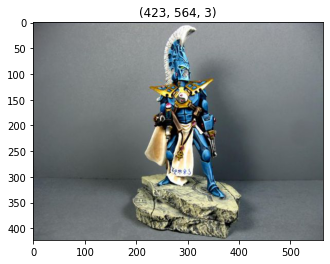

In [14]:
dummy = imageio.imread('test.jpg')
plt.imshow(dummy)
plt.title(dummy.shape);

In [4]:
%%timeit
iii = gray1(dummy)

6.89 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
# this has a slight performance advantage
iii = gray2(dummy)

6.75 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
# this is much facter
iii = cv2.cvtColor(dummy, cv2.COLOR_BGR2GRAY)

71.5 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


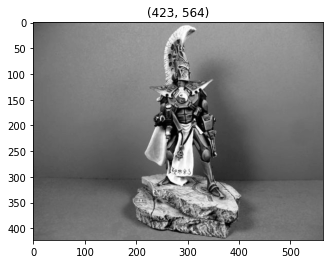

In [15]:
iii = gray1(dummy)
plt.imshow(iii, cmap="gray")
plt.title(iii.shape);

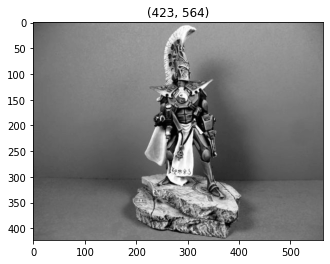

In [72]:
iii = gray2(dummy)
plt.imshow(iii, cmap="gray")
plt.title(iii.shape);

## Grayscale to Color

Sometimes you need to go back to color. However, you cannot recover what the original color is, so you end up making 3 planes of grayscale. However, this allows you to draw on the image in color which is useful for various Computer Vision tasks.

**WARNING:** There is an issue with how OpenCV cannot handle dynamic numpy arrays. The solution is to make a copy of the numpy array (which impacts performance) but solves the problem.

In [68]:
gray2rgbl = lambda g: np.array([g.T,g.T,g.T],dtype=np.uint8).T.copy()

def gray2rgb(g): a=g.T; return np.array([a,a,a],dtype=np.uint8).T.copy()
gray2bgrl = lambda g: gray2rgb(g)

In [65]:
%%timeit
# lambda test, slower because of a lot of copying
c = gray2rgbl(iii)

1.62 ms ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
%%timeit
# function test
c = gray2rgb(iii)

1.62 ms ± 33.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%%timeit
# function test
c = gray2bgrl(iii)

1.61 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
%%timeit
# this is much facter
c = cv2.cvtColor(iii, cv2.COLOR_GRAY2RGB)

40.1 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
